<a href="https://colab.research.google.com/github/Kelompokduaaaa/ALPRO2/blob/main/Kelapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Google DRIVE

In [ ]:
import os
from google.colab import drive
MOUNTPOINT = '/content/gdrive'
DATADIR = os.path.join(MOUNTPOINT, 'Data', 'myfolder')
drive.mount(MOUNTPOINT)

Mounted at /content/gdrive


In [ ]:
import os

print(os.listdir('/content/gdrive/MyDrive/kelapa'))
print(os.listdir('/content/gdrive/MyDrive/kelapa/kelapa_3'))

['Kelapa.ipynb', 'Untitled1.ipynb', 'kelapa_3', 'Untitled0.ipynb']
['kelapa_muda', 'kelapa_setengah_tua', 'kelapa_tua']


#Import Libary yang digunakan

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten,Input
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
from keras.callbacks import ModelCheckpoint
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.metrics import confusion_matrix, classification_report
from IPython.display import display, HTML

#Menampilkan Dataset

In [ ]:
# !ls /content
# !ls /content/gdrive
# !ls /content/gdrive/MyDrive
!ls /content/gdrive/MyDrive/kelapa/kelapa_3/
!ls /content/gdrive/MyDrive/kelapa/kelapa_3/kelapa_muda/
!ls /content/gdrive/MyDrive/kelapa/kelapa_3/kelapa_setengah_tua/
!ls /content/gdrive/MyDrive/kelapa/kelapa_3/kelapa_tua/

kelapa_muda  kelapa_setengah_tua  kelapa_tua
 aug_0_65.jpg
 coconut650.jpg
 download.jpeg
'Gambar WhatsApp 2025-07-11 pukul 16.18.47_28f9a382.jpg'
'Gambar WhatsApp 2025-07-11 pukul 16.18.48_abebf589.jpg'
'Gambar WhatsApp 2025-07-11 pukul 16.18.48_c6be5252.jpg'
'Gambar WhatsApp 2025-07-11 pukul 16.18.49_033d2ad1.jpg'
'Gambar WhatsApp 2025-07-11 pukul 16.18.49_a7aa8e71.jpg'
'Gambar WhatsApp 2025-07-11 pukul 16.18.50_f6ed7cde.jpg'
'Gambar WhatsApp 2025-07-11 pukul 16.18.51_457b1fff.jpg'
'Gambar WhatsApp 2025-07-11 pukul 16.18.51_7f3e6e07.jpg'
'thumb (100).jpg'
'thumb (10).jpg'
'thumb (11).jpg'
'thumb (12).jpg'
'thumb (13).jpg'
'thumb (14).jpg'
'thumb (15).jpg'
'thumb (16).jpg'
'thumb (17).jpg'
'thumb (18).jpg'
'thumb (19).jpg'
'thumb (1).jpg'
'thumb - 2025-06-18T123948.937.jpg'
'thumb - 2025-06-18T124035.787.jpg'
'thumb - 2025-06-18T124052.505.jpg'
'thumb - 2025-06-18T124100.321.jpg'
'thumb - 2025-06-18T124109.168.jpg'
'thumb - 2025-06-18T124119.735.jpg'
'thumb - 2025-06-18T124131.255.jpg

In [ ]:
sdir=r'/content/gdrive/MyDrive/kelapa/kelapa_3/'

filepaths=[]
labels=[]
classlist=os.listdir(sdir)
for klass in classlist:
    classpath=os.path.join(sdir,klass)
    if os.path.isdir(classpath):
        flist=os.listdir(classpath)
        for f in flist:
            fpath=os.path.join(classpath,f)
            filepaths.append(fpath)
            labels.append(klass)
Fseries= pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(labels, name='labels')
df=pd.concat([Fseries, Lseries], axis=1)
print (df.head())
print (df['labels'].value_counts())

                                           filepaths       labels
0  /content/gdrive/MyDrive/kelapa/kelapa_3/kelapa...  kelapa_muda
1  /content/gdrive/MyDrive/kelapa/kelapa_3/kelapa...  kelapa_muda
2  /content/gdrive/MyDrive/kelapa/kelapa_3/kelapa...  kelapa_muda
3  /content/gdrive/MyDrive/kelapa/kelapa_3/kelapa...  kelapa_muda
4  /content/gdrive/MyDrive/kelapa/kelapa_3/kelapa...  kelapa_muda
labels
kelapa_muda            500
kelapa_setengah_tua    500
kelapa_tua             500
Name: count, dtype: int64


#Spliting Data

In [ ]:
from sklearn.model_selection import train_test_split

# Total data = 1500
# Target: Train 750, Test 375, Valid 375

train_df, dummy_df = train_test_split(df, train_size=750, shuffle=True, random_state=123)

test_df, valid_df = train_test_split(dummy_df, test_size=0.5, shuffle=True, random_state=123)


print('Train:', len(train_df))
print('Test:', len(test_df))
print('Valid:', len(valid_df))


Train: 750
Test: 375
Valid: 375


In [ ]:
height=128
width=128
channels=3
batch_size=64

img_shape=(128, 128, 3)
img_size=(128, 128)
length=len(test_df)
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=80],reverse=True)[0]
test_steps=int(length/test_batch_size)
print ( 'test batch size: ' ,test_batch_size, '  test steps: ', test_steps)

gen=ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
    )
train_gen=gen.flow_from_dataframe( train_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)

validgen=ImageDataGenerator(rescale=1./255)
valid_gen=validgen.flow_from_dataframe( valid_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=True, batch_size=batch_size)

testgen=ImageDataGenerator(rescale=1./255)
test_gen=testgen.flow_from_dataframe( test_df, x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=test_batch_size)

classes=list(train_gen.class_indices.keys())
print (classes)
class_count=len(classes)

test batch size:  75   test steps:  5
Found 750 validated image filenames belonging to 3 classes.
Found 375 validated image filenames belonging to 3 classes.
Found 375 validated image filenames belonging to 3 classes.
['kelapa_muda', 'kelapa_setengah_tua', 'kelapa_tua']


#Menampilkan Gambar Dataset

In [ ]:
def show_image_samples(gen):
    test_dict=test_gen.class_indices
    classes=list(test_dict.keys())
    images,labels=next(gen) # get a sample batch from the generator
    plt.figure(figsize=(20, 20))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image=images[i]
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='blue', fontsize=16)
        plt.axis('off')
    plt.show()

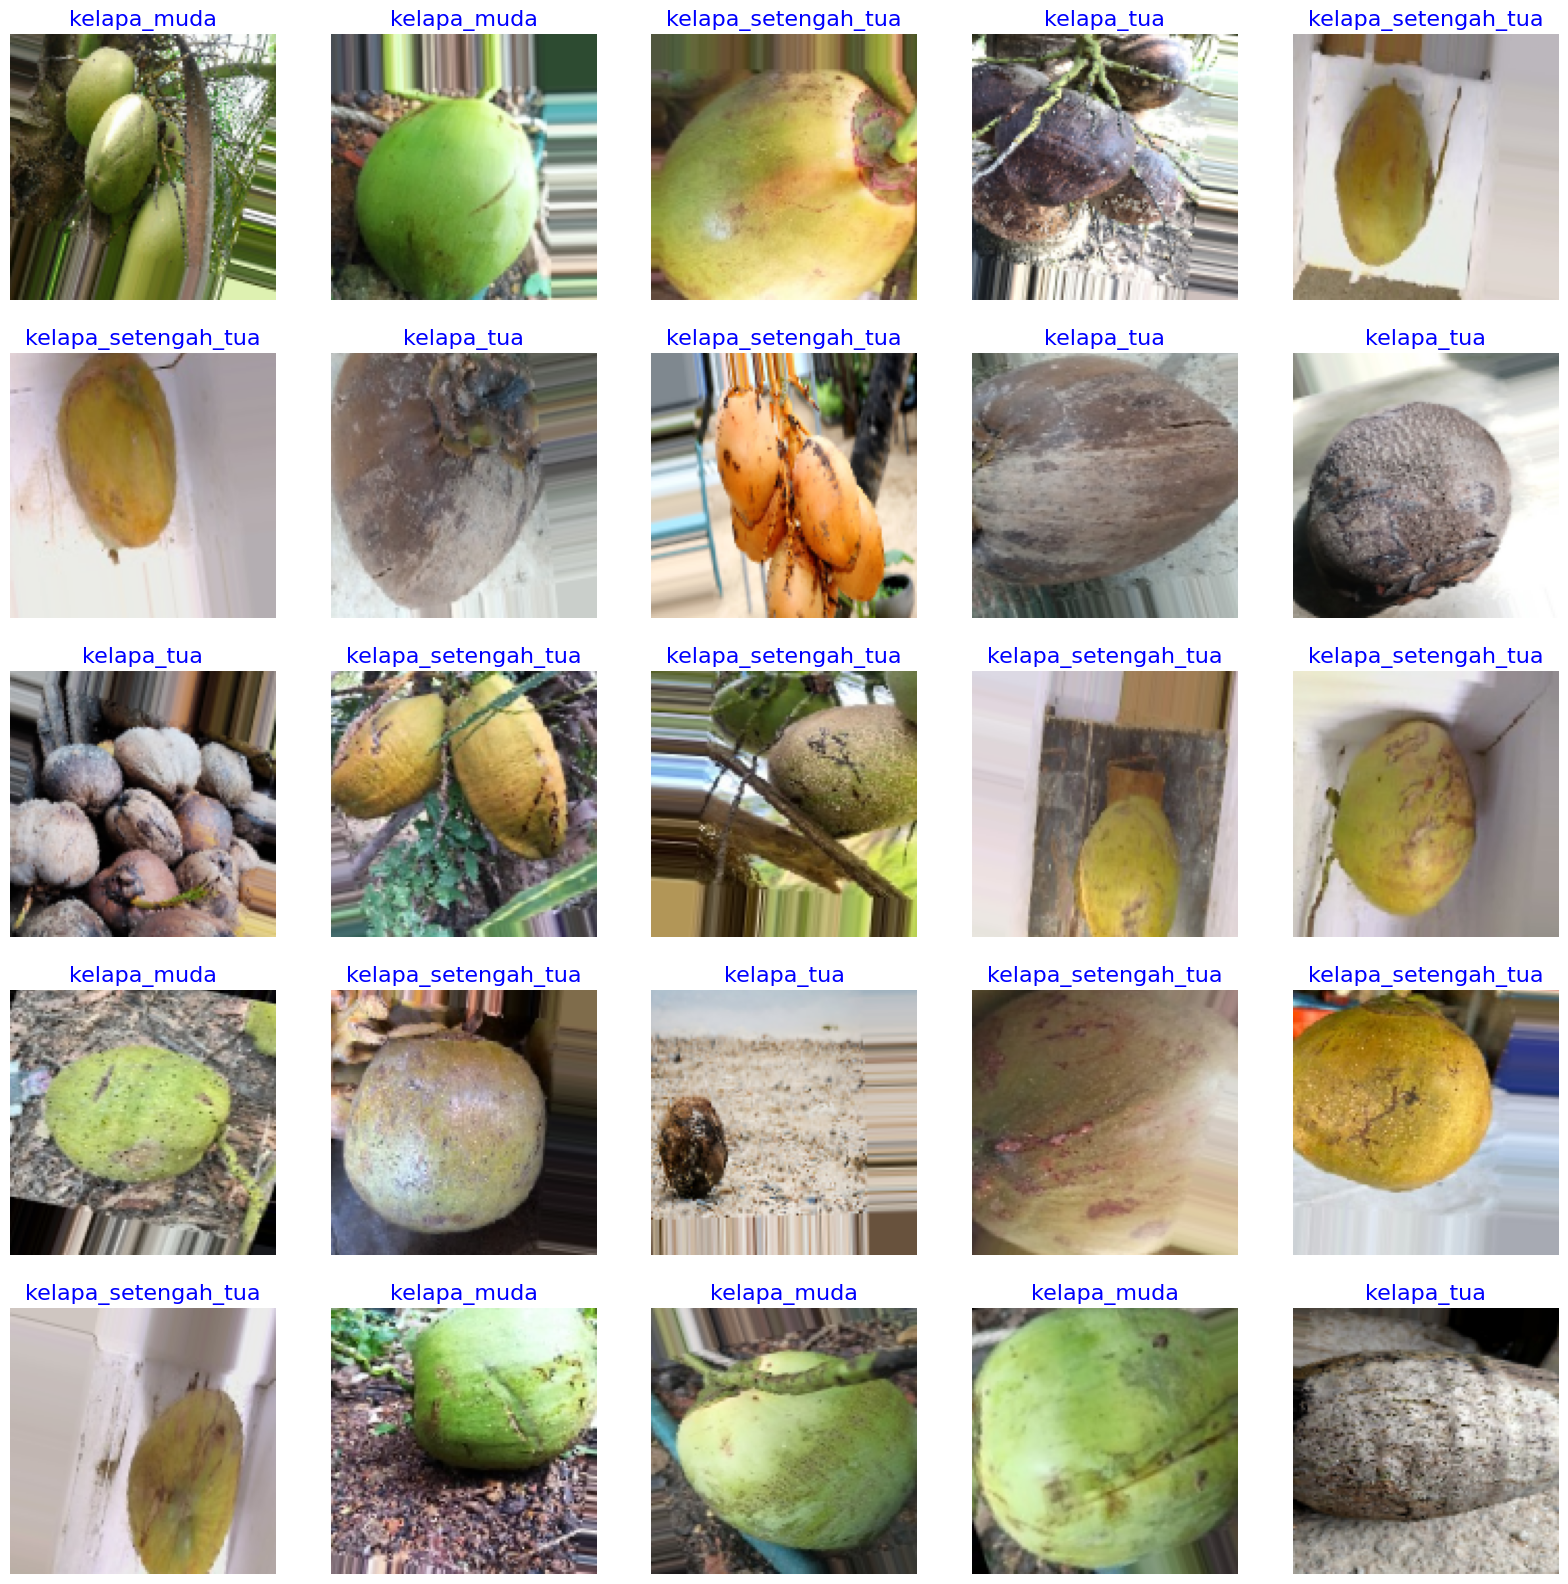

In [ ]:
show_image_samples(train_gen)
title="argumentasi gambar"

#Mendowload Arsitektur MobileNetV2

In [ ]:
base_model=tf.keras.applications.MobileNetV2(include_top=False, weights="imagenet",input_tensor=Input(shape=(128,128,3)))

/tmp/ipython-input-10-3139771727.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model=tf.keras.applications.MobileNetV2(include_top=False, weights="imagenet",input_tensor=Input(shape=(128,128,3)))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#Menampilkan Base Model

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
base_model.trainable = False

#Pembuatan Model

In [ ]:
import tensorflow as tf

model_name = 'Cendekia'
print("Building model with", model_name)

# Pastikan base_model sudah didefinisikan sebelumnya
# Misalnya, jika menggunakan model pretrained:
# base_model = tf.keras.applications.MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=3, activation='relu', strides=1),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Building model with Cendekia


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 4, 4, 32)       │       368,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,627,043 (10.02 MB)

 Trainable params: 369,059 (1.41 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

#Train Model

In [ ]:
epochs =50

history=model.fit(x=train_gen, epochs=epochs, validation_data=valid_gen)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


12/12 ━━━━━━━━━━━━━━━━━━━━ 243s 20s/step - accuracy: 0.5299 - loss: 3.2918 - val_accuracy: 0.8960 - val_loss: 0.3072
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8175 - loss: 0.4574 - val_accuracy: 0.9067 - val_loss: 0.2209
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8698 - loss: 0.3571 - val_accuracy: 0.9440 - val_loss: 0.1506
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8967 - loss: 0.2372 - val_accuracy: 0.9387 - val_loss: 0.1706
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9002 - loss: 0.2702 - val_accuracy: 0.9413 - val_loss: 0.1453
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9107 - loss: 0.2310 - val_accuracy: 0.9440 - val_loss: 0.1606
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9081 - loss: 0.2266 - val_accuracy: 0.9387 - val_loss: 0.1395
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9063 - loss: 0.1802 - val_accuracy: 0.9547 - val_loss: 0.1639
E

In [ ]:
def print_in_color(txt_msg,fore_tupple,back_tupple,):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m'
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

In [ ]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    #plt.style.use('fivethirtyeight')
    plt.show()

In [ ]:
def print_info( test_gen, preds, print_code, save_dir, subject ):
    class_dict=test_gen.class_indices
    labels= test_gen.labels
    file_names= test_gen.filenames
    error_list=[]
    true_class=[]
    pred_class=[]
    prob_list=[]
    new_dict={}
    error_indices=[]
    y_pred=[]
    for key,value in class_dict.items():
        new_dict[value]=key             # dictionary {integer of class number: string of class name}
    # store new_dict as a text fine in the save_dir
    classes=list(new_dict.values())     # list of string of class names
    dict_as_text=str(new_dict)
    dict_name= subject + '-' +str(len(classes)) +'.txt'
    dict_path=os.path.join(save_dir,dict_name)
    with open(dict_path, 'w') as x_file:
        x_file.write(dict_as_text)
    errors=0
    for i, p in enumerate(preds):
        pred_index=np.argmax(p)
        true_index=labels[i]  # labels are integer values
        if pred_index != true_index: # a misclassification has occurred
            error_list.append(file_names[i])
            true_class.append(new_dict[true_index])
            pred_class.append(new_dict[pred_index])
            prob_list.append(p[pred_index])
            error_indices.append(true_index)
            errors=errors + 1
        y_pred.append(pred_index)
    if print_code !=0:
        if errors>0:
            if print_code>errors:
                r=errors
            else:
                r=print_code
            msg='{0:^28s}{1:^28s}{2:^28s}{3:^16s}'.format('Filename', 'Predicted Class' , 'True Class', 'Probability')
            print_in_color(msg, (0,255,0),(55,65,80))
            for i in range(r):
                split1=os.path.split(error_list[i])
                split2=os.path.split(split1[0])
                fname=split2[1] + '/' + split1[1]
                msg='{0:^28s}{1:^28s}{2:^28s}{3:4s}{4:^6.4f}'.format(fname, pred_class[i],true_class[i], ' ', prob_list[i])
                print_in_color(msg, (255,255,255), (55,65,60))
                #print(error_list[i]  , pred_class[i], true_class[i], prob_list[i])
        else:
            msg='With accuracy of 100 % there are no errors to print'
            print_in_color(msg, (0,255,0),(55,65,80))
    if errors>0:
        plot_bar=[]
        plot_class=[]
        for  key, value in new_dict.items():
            count=error_indices.count(key)
            if count!=0:
                plot_bar.append(count) # list containg how many times a class c had an error
                plot_class.append(value)   # stores the class
        fig=plt.figure()
        fig.set_figheight(len(plot_class)/3)
        fig.set_figwidth(10)
        plt.style.use('fivethirtyeight')
        for i in range(0, len(plot_class)):
            c=plot_class[i]
            x=plot_bar[i]
            plt.barh(c, x, )
            plt.title( ' Errors by Class on Test Set')
    y_true= np.array(labels)
    y_pred=np.array(y_pred)
    if len(classes)<= 30:
        # create a confusion matrix
        cm = confusion_matrix(y_true, y_pred )
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    clr = classification_report(y_true, y_pred, target_names=classes)
    print("Classification Report:\n----------------------\n", clr)

#Menampilkan Grafik Train

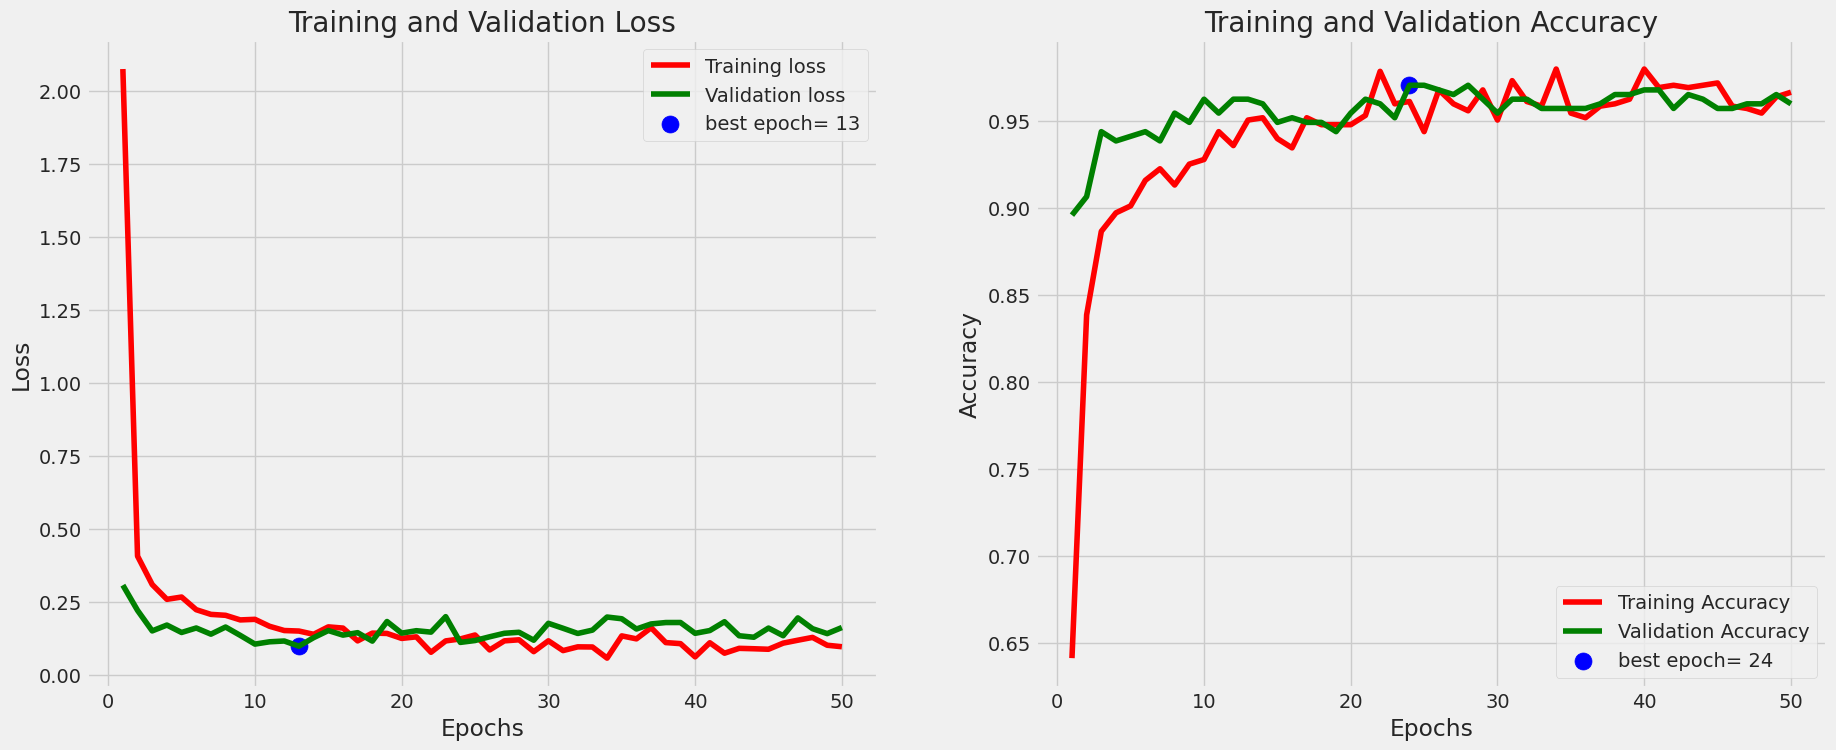

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 54s 13s/step - accuracy: 0.9481 - loss: 0.1360
accuracy on the test set is 94.93 %



In [ ]:
tr_plot(history,0)
save_dir=r'./'
subject='pest'
acc=model.evaluate( test_gen, batch_size=test_batch_size, verbose=1, steps=test_steps, return_dict=False)[1]*100
msg=f'accuracy on the test set is {acc:5.2f} %'
print_in_color(msg, (0,255,0),(55,65,80))
save_id=str (model_name +  '-' + subject +'-'+ str(acc)[:str(acc).rfind('.')+3] + '.h5')
save_loc=os.path.join(save_dir, save_id)
model.save(save_loc)

#Menampilkan Hasil Confusion Matrix

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(75, 128, 128, 3))
  warnings.warn(msg)


5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step


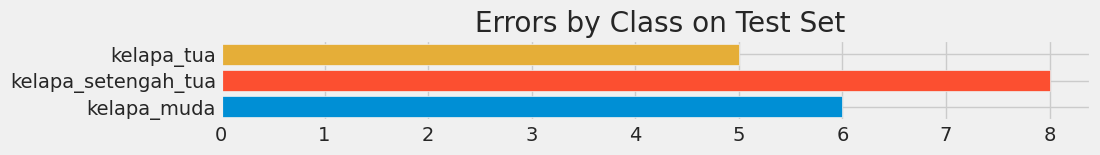

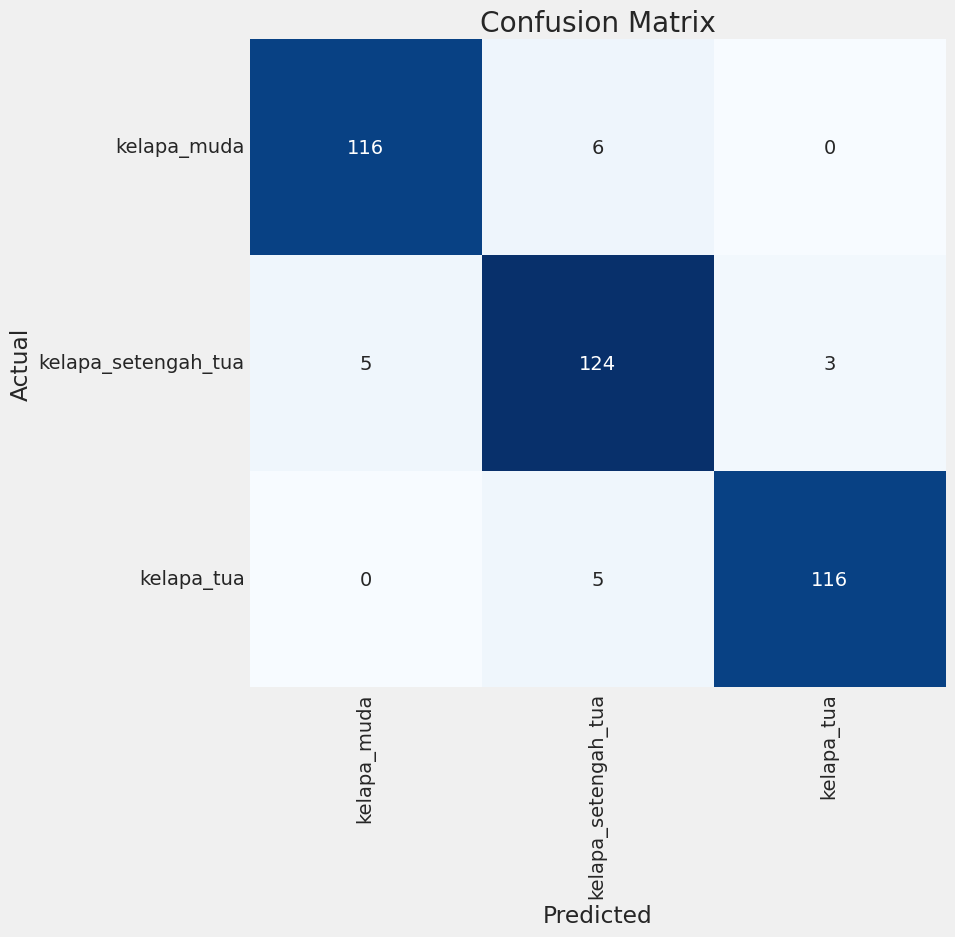

Classification Report:
----------------------
                      precision    recall  f1-score   support

        kelapa_muda       0.96      0.95      0.95       122
kelapa_setengah_tua       0.92      0.94      0.93       132
         kelapa_tua       0.97      0.96      0.97       121

           accuracy                           0.95       375
          macro avg       0.95      0.95      0.95       375
       weighted avg       0.95      0.95      0.95       375



In [ ]:
print_code=0
preds=model.predict(test_gen)
print_info( test_gen, preds, print_code, save_dir, subject )

#Testing Model

Mounted at /content/drive


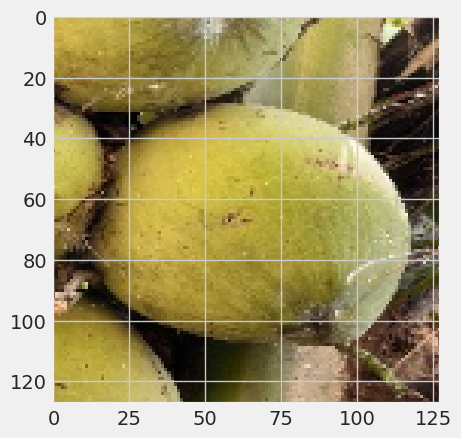

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Nilai yang diprediksi adalah: [1.4042495e-04 9.9985957e-01 2.5672008e-12]
Label yang diprediksi adalah: 1 : kelapa_setengah_tua


In [ ]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Path ke folder yang berisi model dan gambar
folder_path = '/content/drive/My Drive/kelapa/kelapa_3/kelapa_setengah_tua/'

# List nama file gambar dalam folder
file_names = os.listdir(folder_path)

# Pilih satu gambar (misalnya, gambar ke-0)
selected_file = file_names[10]

# Baca gambar dari path yang benar
image_path = os.path.join(folder_path, selected_file)
image = imread(image_path) / 255.0
image = resize(image, (128, 128))  # Ubah ke ukuran yang diharapkan oleh model

# Tampilkan gambar
plt.imshow(image)
plt.show()

# Siapkan gambar untuk prediksi
input_image = np.expand_dims(image, axis=0)  # Tambahkan dimensi batch

# Lakukan prediksi
prediction = model.predict(input_image)[0]
predicted_label = np.argmax(prediction)
print("Nilai yang diprediksi adalah:", prediction)
print("Label yang diprediksi adalah:", predicted_label, ":", classes[predicted_label])

In [ ]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 4


In [ ]:
print(train_gen)

#Simpan Model

In [ ]:
import os

# Create the directory if it doesn't exist
save_dir = 'save'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

model.save(os.path.join(save_dir, 'mobilenetv2_model.keras'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

print("Isi MyDrive:")
print(os.listdir('/content/drive/MyDrive'))

print("Isi kelapa:")
print(os.listdir('/content/drive/MyDrive/kelapa/kelapa_3/'))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Isi MyDrive:
['kelapa', 'Classroom', 'IMG-20240814-WA0001.jpg', 'IMG-20240830-WA0003.jpg', 'Operasi Baris Elementer ', 'Presentasi tanpa judul (1).gslides', 'Presentasi tanpa judul.gslides', 'ayuWidyawatitugasmatriks.pdf', 'ayu Widyawati tugas pengantar teknik informatika.pdf', 'TUGAS PENGANTAR TEKNIK INFORMATIKA (1).pdf', 'TUGAS PENGANTAR TEKNIK INFORMATIKA (3).pdf', 'Ayu Widyawati.pdf', 'Ayu Widyawati MID Matriks nomor 1.pdf', 'Ringkasan dan Simpulan Game 2D.pdf', 'PSEUCODE ATAU KODE PROGRAM DALAM GAME.pdf', 'IMPLEMENTASI VEKTOR YANG DIGUNAKAN DALAM GAME.pdf', '2025-01-12 18-22-01 (1).mp4', 'code game.jpg', 'Colab Notebooks', 'latihan_praktikum', 'Ayu Widyawati (202455202003) mid logika diskrit (1).pdf', 'Ayu Widyawati (202455202003) mid logika diskrit.pdf', 'Untitled0.ipynb', 'ayu widyawati(202455202003) mid metode numerik.pdf', 'CNN-batik-classification',

#Load Model

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


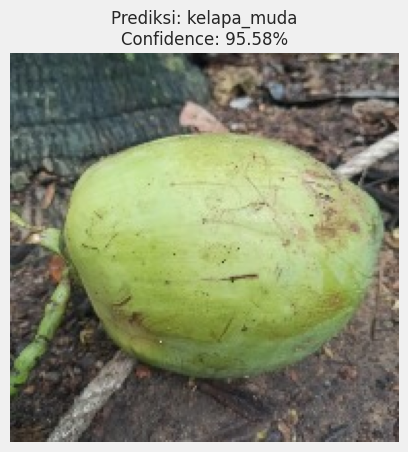

✅ File diambil : /content/drive/MyDrive/kelapa/kelapa_3/kelapa_muda/thumb - 2025-06-18T125606.827.jpg
✅ Label asli   : kelapa_muda
✅ Prediksi     : kelapa_muda
✅ Confidence   : 95.58%


In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# ✅ Path folder utama (PASTIKAN BENAR!)
base_path = '/content/drive/MyDrive/kelapa/kelapa_3'

# ✅ Daftar kelas (subfolder)
class_names = ['kelapa_muda', 'kelapa_setengah_tua', 'kelapa_tua']

# Cek apakah base_path ada
if not os.path.exists(base_path):
    raise FileNotFoundError(f"Folder base_path tidak ditemukan: {base_path}")

# Pilih kelas secara acak
chosen_class = random.choice(class_names)
class_path = os.path.join(base_path, chosen_class)

# Cek apakah folder kelas ada
if not os.path.exists(class_path):
    raise FileNotFoundError(f"Folder kelas tidak ditemukan: {class_path}")

# Ambil daftar file gambar di folder kelas
image_files = os.listdir(class_path)
if len(image_files) == 0:
    raise FileNotFoundError(f"Tidak ada file di folder: {class_path}")

# Ambil 1 gambar acak
random_image = random.choice(image_files)
img_path = os.path.join(class_path, random_image)

# Cek file gambar ada
if not os.path.exists(img_path):
    raise FileNotFoundError(f"Gambar tidak ditemukan: {img_path}")

# ✅ Load model
model = load_model("save/mobilenetv2_model.keras")

# ✅ Load & preprocess gambar
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# ✅ Prediksi
pred = model.predict(img_array)
predicted_class = np.argmax(pred)
confidence = np.max(pred) * 100  # Confidence asli dari model

# ✅ Tampilkan hasil & gambar
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.title(f"Prediksi: {class_names[predicted_class]}\nConfidence: {confidence:.2f}%", fontsize=12)
plt.show()

# Info tambahan
print(f"✅ File diambil : {img_path}")
print(f"✅ Label asli   : {chosen_class}")
print(f"✅ Prediksi     : {class_names[predicted_class]}")
print(f"✅ Confidence   : {confidence:.2f}%")


In [ ]:
import tensorflow as tf

# 1️⃣ Buat base model MobileNetV2 (pre-trained)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base model

# 2️⃣ Tambah custom head
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(3, activation='softmax')  # Misal 3 kelas
])

# 3️⃣ Compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 4️⃣ Train (Contoh dummy — ganti X_train, y_train dengan datamu)
# >>> Harus pakai one-hot label kalau pakai 'categorical_crossentropy'
# model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

# 5️⃣ Save ke H5 (optional)
model.save('model_kelapa.h5')
print("✅ Model .h5 berhasil disimpan.")

# 6️⃣ Convert ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# 7️⃣ Simpan file .tflite
with open('model_kelapa.tflite', 'wb') as f:
    f.write(tflite_model)

print("✅ Model berhasil di-convert ke 'model_kelapa.tflite' untuk Android Studio!")

# 8️⃣ (Optional) Download ke lokal
from google.colab import files
files.download('model_kelapa.tflite')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


✅ Model .h5 berhasil disimpan.
Saved artifact at '/tmp/tmp67lya18x'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  132916022836304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132916023658064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132916023661328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132916023660944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132916023659792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132916023661520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132916023660560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132916023656720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132916023661712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132916023659216: TensorSpec(shape=(), dtype=tf.re

Model 'save/mobilenetv2_model.keras' berhasil di-load!
Upload gambar yang mau diuji


Saving Gambar WhatsApp 2025-07-11 pukul 16.18.49_033d2ad1.jpg to Gambar WhatsApp 2025-07-11 pukul 16.18.49_033d2ad1.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


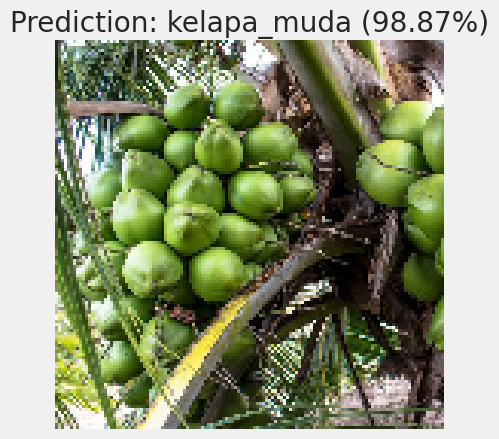

Hasil prediksi: kelapa_muda (98.87%)


In [ ]:
# ==============================================
# ✅ 1. Import library
# ==============================================
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import os

# ==============================================
# ✅ 2. Load model
# ==============================================
# Assuming the model is saved as 'mobilenetv2_model.keras' in the 'save' directory
model_path = 'save/mobilenetv2_model.keras'
model = tf.keras.models.load_model(model_path)
print(f"Model '{model_path}' berhasil di-load!")

# ==============================================
# ✅ 3. Upload gambar untuk test deteksi
# ==============================================
print("Upload gambar yang mau diuji")
uploaded = files.upload()

img_filename = list(uploaded.keys())[0]  # ambil nama file gambar

# ==============================================
# ✅ 4. Preprocess gambar (resize & normalize)
# ==============================================
img = image.load_img(img_filename, target_size=(128, 128))  # Ganti (128, 128) sesuai input model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # normalisasi kalau model pakai normalisasi

# ==============================================
# ✅ 5. Prediksi gambar
# ==============================================
prediction = model.predict(img_array)

# ==============================================
# ✅ 6. Mapping ke label kelas
# ==============================================
# Ganti dengan label kelas sesuai model kamu!
classes = ['kelapa_muda', 'kelapa_setengah_tua', 'kelapa_tua']

predicted_class = classes[np.argmax(prediction)]
confidence = np.max(prediction) * 100

# ==============================================
# ✅ 7. Tampilkan gambar & hasil deteksi
# ==============================================
plt.imshow(img)
plt.axis('off')
plt.title(f'Prediction: {predicted_class} ({confidence:.2f}%)')
plt.show()

print(f'Hasil prediksi: {predicted_class} ({confidence:.2f}%)')